# 신경망 학습

In [9]:
import numpy as np

In [6]:
# 이하의 함수들은 넘파이 배열을 사용
y = [0,0,1,0,0,0,0,0]
t = [0,0,0,0,0,0,0,0]

In [3]:
# 평균 제곱 오차(MSE)
# (계산값-정답)^2 의 합을 1/2 한 것

def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [4]:
# 교차 엔트로피 오차(CEE)

def cross_entropy_error(y, t):
    delta = 1e-7 # 로그함수에 0을 넣으면 음수 무한대가 되어 에러발생
    return -np.sum(t * np.log(y + delta)) # 아주 작은 델타를 더해준다

In [7]:
from mnist import load_mnist
(x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten = True, normalize=False)

In [21]:
# 미니배치 구현

train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
# np.random.choice(x,y)는 0~x까지의 숫자 중 임의의 y개를 출력하는 함수
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]
batch_mask

array([22221, 46565, 36279,  6076,  1420, 32260,   326, 25488, 23751, 57862])

In [23]:
# 오차를 구현한 교차 엔트로피 오차(CEE)

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    delta = 1e-7 # 로그함수에 0을 넣으면 음수 무한대가 되어 에러발생
    return -np.sum(t * np.log(y + delta)) / batch_size # 아주 작은 델타를 더해준다

In [25]:
# 기계학습을 위해 만든 수치미분
def numerical_diff(f, x):
    h = 1e-4 # 0.001  대략 이정도의 수치가 좋은 결과를 낸다고 알려져 있다
    return (f(x+h) - f(x-h)) / (2*h) # 전방차분이 아닌 중심차분을 사용한다

# 우리가 일반적으로 말하는 미분은 해석적 미분이고
# 이 경우는 근사치를 이용해 구하는 수치미분이다.

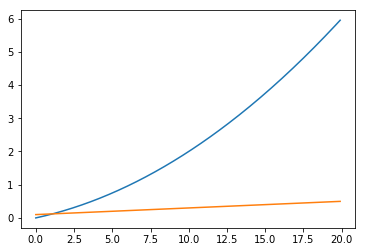

In [29]:
# 수치미분 예제

def function_1(x):
    return 0.01*x**2 + 0.1*x

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 20, 0.1)
y = function_1(x)
y2 = numerical_diff(function_1, x)

plt.plot(x,y)
plt.plot(x,y2)
plt.show()

In [47]:
# 편미분

def function_2(x):
    return np.sum(x**2)

In [56]:
# 기울기(그래디언트)

def numerical_gradient(f, x):
    h = 0.00001
    grad = np.zeros_like(x) # x와 형상이 같고 모든 원소가 0인 배열 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
        return grad

In [57]:
numerical_gradient(function_2, np.array([1,1]))

array([49999,     0])